In [55]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# Loading the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [57]:
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32')
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32')

In [58]:
print("Ground truth label:", test_labels[0])

Ground truth label: 9


In [59]:
# Normalizing images (pixel values between 0 and 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

In [60]:
print("Train images min/max:", train_images.min(), train_images.max())

Train images min/max: 0.0 1.0


In [61]:
# Defining class names for reference
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [62]:
# Build the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.7556 - loss: 0.6563 - val_accuracy: 0.8708 - val_loss: 0.3597
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.8845 - loss: 0.3162 - val_accuracy: 0.8947 - val_loss: 0.2942
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9049 - loss: 0.2568 - val_accuracy: 0.9012 - val_loss: 0.2724
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.9191 - loss: 0.2189 - val_accuracy: 0.9041 - val_loss: 0.2609
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.9274 - loss: 0.1940 - val_accuracy: 0.9082 - val_loss: 0.2457


In [66]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("\nTest accuracy from Keras:", test_acc * 100, "%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9047 - loss: 0.2593

Test accuracy from Keras: 90.82000255584717 %


In [67]:
y_pred_probs = model.predict(test_images)
y_pred = y_pred_probs.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [68]:
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy using scikit-learn:", accuracy * 100, "%")

Accuracy using scikit-learn: 90.82000000000001 %


In [69]:
print("\nSample predictions vs. ground truth:")
for i in range(10):  # change 10 to more if you want!
    print(f"Image {i+1}: Predicted = {y_pred[i]}, True = {test_labels[i]}")



Sample predictions vs. ground truth:
Image 1: Predicted = 9, True = 9
Image 2: Predicted = 2, True = 2
Image 3: Predicted = 1, True = 1
Image 4: Predicted = 1, True = 1
Image 5: Predicted = 6, True = 6
Image 6: Predicted = 1, True = 1
Image 7: Predicted = 4, True = 4
Image 8: Predicted = 6, True = 6
Image 9: Predicted = 5, True = 5
Image 10: Predicted = 7, True = 7


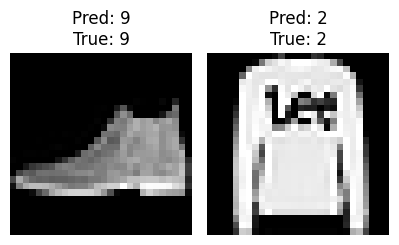

In [70]:
plt.figure(figsize=(10, 5))
for i in range(2):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}\nTrue: {test_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()